In [1]:
import numpy as np
import pylab as plt

# map cell to cell, add circular cell to goal point
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

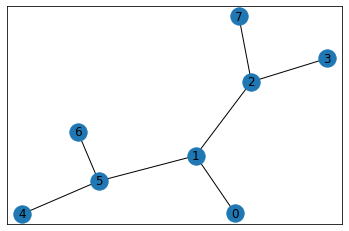

In [4]:
goal = 7
import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [5]:
# how many points in graph? x points
MATRIX_SIZE = 8

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [12]:
# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0


R


(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,   0.]])

In [13]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.8

initial_state = 0

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):
    
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  
  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)
  
  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)
    
update(initial_state, action, gamma)


max_value 0.0


0

max_value 113.72008559046078
Score: 946.667949226489
max_value 142.15010698807598
Score: 946.6825599699307
max_value 222.10954216886867
Score: 946.6825599699307
max_value 142.15010698807598
Score: 946.6825599699307
max_value 177.68763373509495
Score: 946.6825599699307
max_value 177.68763373509495
Score: 946.6825599699307
max_value 222.10954216886867
Score: 946.6825599699307
max_value 142.15010698807598
Score: 946.6825599699307
max_value 142.15010698807598
Score: 946.6825599699307
max_value 142.15010698807598
Score: 946.6825599699307
max_value 177.68763373509495
Score: 946.6825599699307
max_value 142.15010698807598
Score: 946.6825599699307
max_value 142.15010698807598
Score: 946.6825599699307
max_value 142.15010698807598
Score: 946.6825599699307
max_value 142.15010698807598
Score: 946.6825599699307
max_value 222.10954216886867
Score: 946.6825599699307
max_value 177.68763373509495
Score: 946.6825599699307
max_value 177.68763373509495
Score: 946.6825599699307
max_value 177.68763373509495


max_value 177.77381320085362
Score: 946.7105929832396
max_value 142.2201923588371
Score: 946.7110040364419
max_value 142.2201923588371
Score: 946.7114150896441
max_value 222.21905056068292
Score: 946.7120573602725
max_value 177.77524044854636
Score: 946.7125711767754
max_value 222.21905056068292
Score: 946.7125711767754
max_value 113.77615388706968
Score: 946.7129000193372
max_value 222.21905056068292
Score: 946.7129000193372
max_value 142.2201923588371
Score: 946.7129000193372
max_value 177.77381320085362
Score: 946.7129000193372
max_value 177.77381320085362
Score: 946.7129000193372
max_value 142.2201923588371
Score: 946.7129000193372
max_value 222.21905056068292
Score: 946.7129000193372
max_value 177.77524044854636
Score: 946.7129000193372
max_value 142.2201923588371
Score: 946.7129000193372
max_value 113.77615388706968
Score: 946.7129000193372
max_value 177.77524044854636
Score: 946.7129000193372
max_value 177.77524044854636
Score: 946.7129000193372
max_value 177.77524044854636
Scor

max_value 222.22188166765764
Score: 946.7186080628172
max_value 142.22169010571506
Score: 946.7186080628172
max_value 177.77735208457207
Score: 946.7186942658235
max_value 222.22188166765764
Score: 946.7187632282286
max_value 177.77750533412612
Score: 946.7188183981525
max_value 142.22188166765767
Score: 946.7188873605576
max_value 142.22188166765767
Score: 946.7189563229626
max_value 142.22188166765767
Score: 946.7189563229626
max_value 177.77750533412612
Score: 946.7190114928866
max_value 222.22188166765764
Score: 946.7190114928866
max_value 177.77735208457207
Score: 946.7190976958929
max_value 142.22188166765767
Score: 946.7191666582978
max_value 177.77735208457207
Score: 946.7191666582978
max_value 142.22188166765767
Score: 946.7191666582978
max_value 177.77735208457207
Score: 946.7191666582978
max_value 177.77750533412612
Score: 946.7191666582978
max_value 142.22188166765767
Score: 946.7191666582978
max_value 177.77735208457207
Score: 946.7191666582978
max_value 177.77735208457207

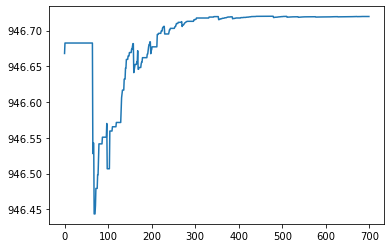

In [15]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

# Testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()